<a href="https://colab.research.google.com/github/Srikhanth14/CBTC/blob/main/Unemployment_Analysis_2019_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**

### Our project delves into the intricate landscape of unemployment in India for the years 2019-2020, meticulously examining the trends before and after a significant nationwide lockdown. Our aim is to uncover the dynamics of joblessness, regional variations, and the impact of external factors on employment.

## **Import Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection and Preprocessing**

In [ ]:
# Loading the dataset
df = pd.read_excel("Unemployment in India.xlsx")

In [ ]:
# Displaying first five rows of the dataset
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Displaying the number of rows and columns
print("Number of rows= ", df.shape[0])
print("Number of columns= ", df.shape[1])

Number of rows=  754
Number of columns=  7


In [ ]:
# Get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [ ]:
# Checking for null values
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

## **Handle the Missing Value**

In [ ]:
#Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [ ]:
# Checking for duplicated values
print("Is there any duplicated values = ", df.duplicated().any())

Is there any duplicated values =  False


In [ ]:
#Checking Shape of the Dataset
df.shape

(740, 7)

In [ ]:
# Statistical summary of the dataset
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## **Renaming the columns for clarity**

In [ ]:
df.rename(columns={'Region': 'States', 'Date': 'Date', ' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)',
                  ' Estimated Employed': 'Estimated Employed', 'Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate(%)',
                   'Area': 'Area'}, inplace=True)

In [ ]:
df.head(2)

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
# Extract the month name from the Date Column and create a new column named as 'Month_Name'
df['Month_Name'] = df['Date'].dt.strftime('%B')

In [ ]:
df['Year']=df['Date'].dt.year

In [ ]:
# Drop the irrelevant feature
df.drop('Frequency', axis=1, inplace=True)

In [ ]:
df.head(2)

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Area,Month_Name,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,June,2019


## **Data Visualization**

In [ ]:
# States Analysis
Avg_States = df.groupby('States')['Estimated Unemployment Rate (%)'].mean()
Avg_States

States
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64

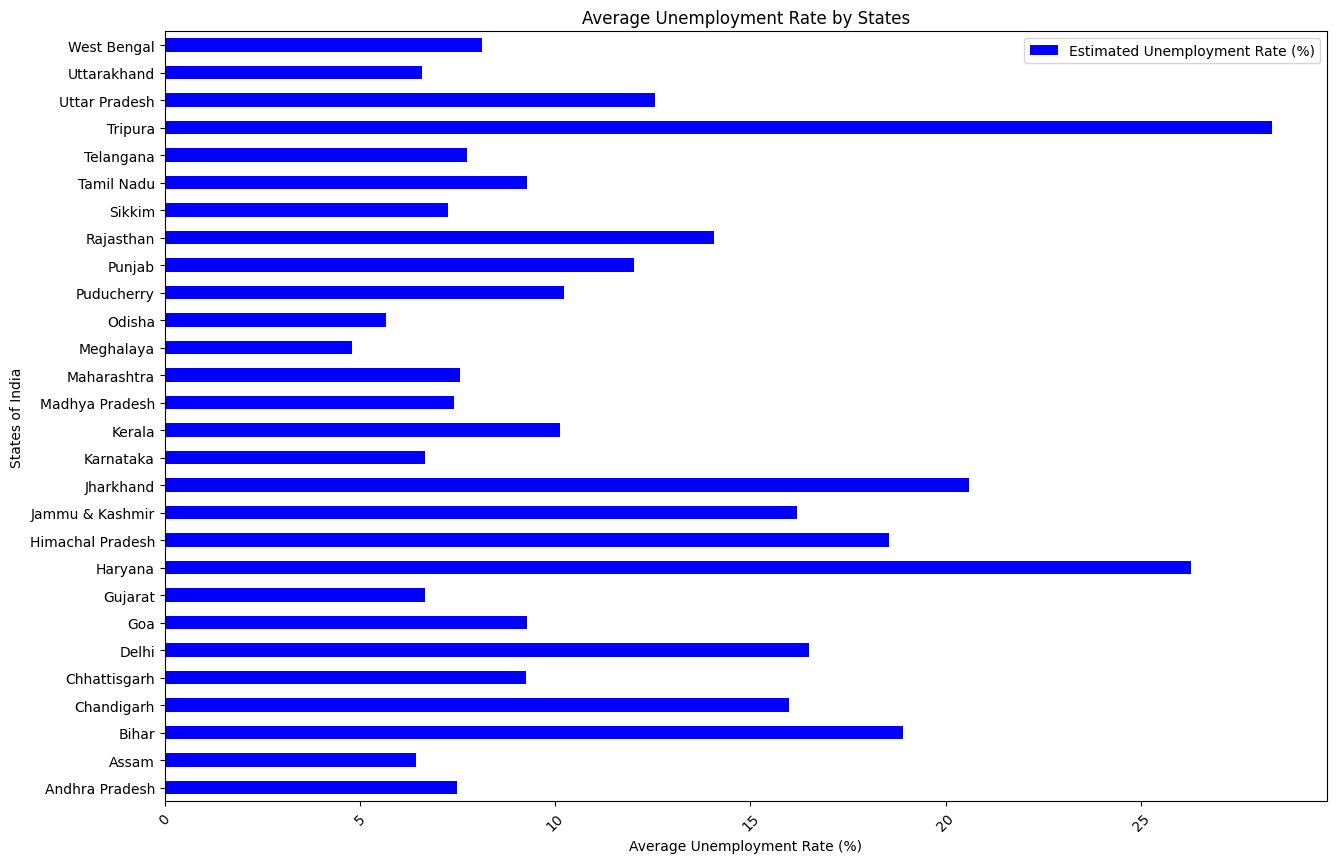

In [ ]:
# Visualization of States Analysis
# This bar chart illustrates the average unemployment rate across different states in India.

plt.figure(figsize=(15, 10))
Avg_States.plot(kind='barh', color='blue')
plt.ylabel('States of India')
plt.xlabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by States')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Urban vs. Rural Analysis
area_employed = df.groupby('Area')['Estimated Employed'].mean()
area_employed

Area
Rural    1.019285e+07
Urban    4.388626e+06
Name: Estimated Employed, dtype: float64

In [ ]:
# Convert the mean value to a readable format (e.g., with two decimal places)
area_employed = area_employed.apply(lambda x: f'{x:.2f}')
area_employed = area_employed.astype('float')
area_employed

Area
Rural    10192852.57
Urban     4388625.58
Name: Estimated Employed, dtype: float64

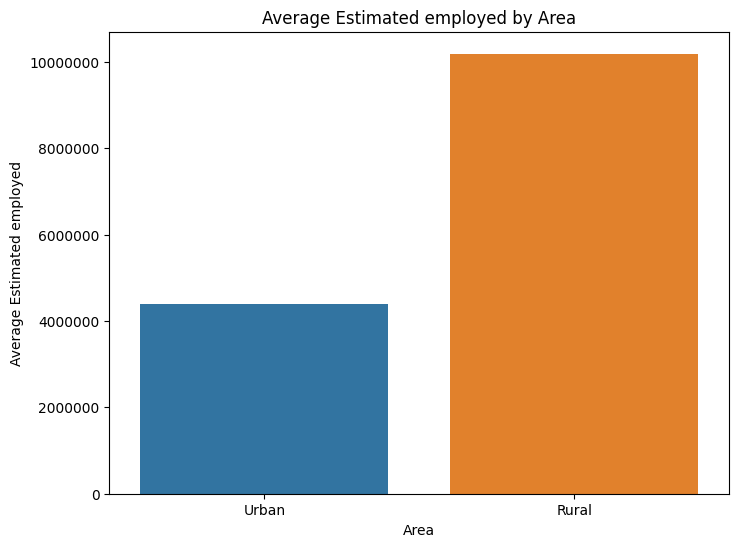

In [ ]:
# Visualization of Urban vs. Rural Analysis
# This bar chart compares the average estimated employment levels between urban and rural areas.
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=area_employed.index, y=area_employed.values, data=area_employed)
plt.xlabel('Area')
plt.ylabel('Average Estimated employed')
plt.title('Average Estimated employed by Area')
ax.yaxis.set_major_formatter('{:.0f}'.format)
plt.xticks([0, 1], ['Urban', 'Rural'])   # Set custom x-axis labels
plt.show()

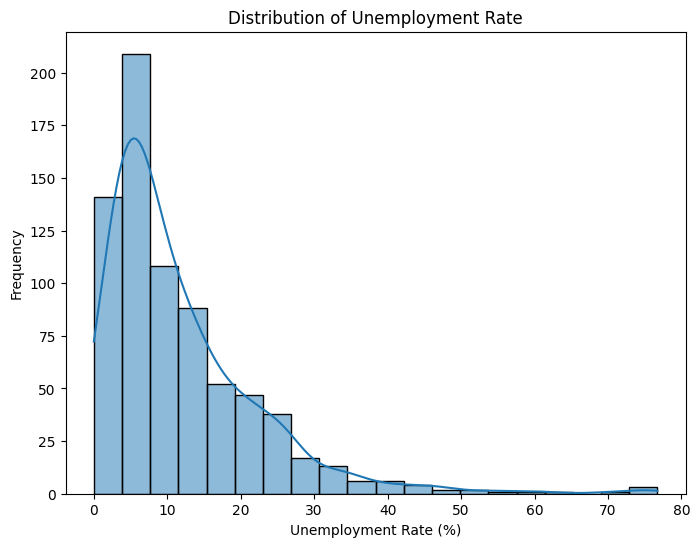

In [ ]:
# Visualization of Unemployment Rate Distribution
# This histogram displays the distribution of unemployment rates in the dataset.
plt.figure(figsize=(8, 6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment Rate')
plt.show()

In [ ]:
# Temporal Analysis
temporal_stats = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
temporal_stats

Date
2019-05-31     8.874259
2019-06-30     9.303333
2019-07-31     9.033889
2019-08-31     9.637925
2019-09-30     9.051731
2019-10-31     9.900909
2019-11-30     9.868364
2019-12-31     9.497358
2020-01-31     9.950755
2020-02-29     9.964717
2020-03-31    10.700577
2020-04-30    23.641569
2020-05-31    24.875294
2020-06-30    11.903600
Name: Estimated Unemployment Rate (%), dtype: float64

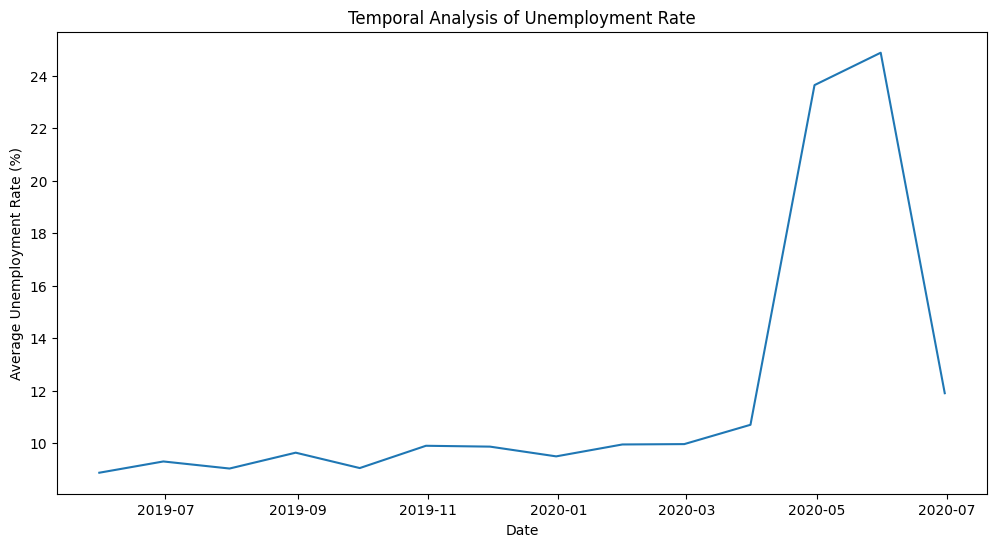

In [ ]:
# Visualization of Temporal Analysis (line chart)
# This line chart tracks the average unemployment rate over time, providing insights into the temporal trends.
plt.figure(figsize=(12, 6))
sns.lineplot(data=temporal_stats)
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Temporal Analysis of Unemployment Rate')
plt.show()

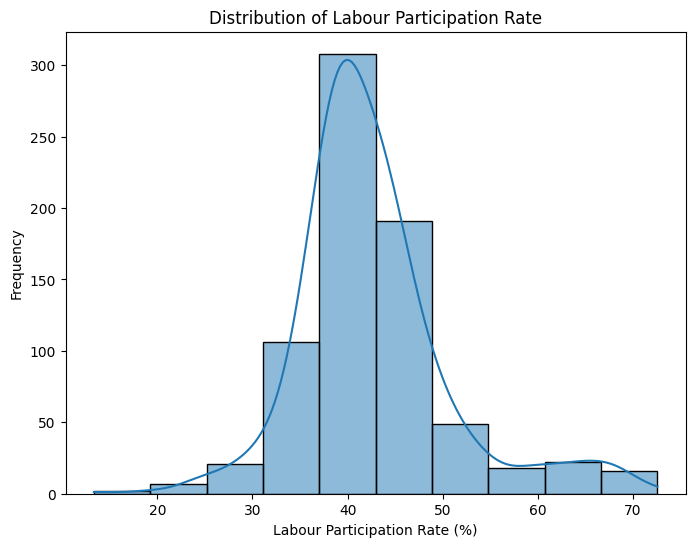

In [ ]:
# Visualization of Labour Participation Rate
# This histogram illustrates the distribution of labor participation rates.
plt.figure(figsize=(8, 6))
sns.histplot(df['Estimated Labour Participation Rate(%)'], bins=10, kde=True)
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Labour Participation Rate')
plt.show()

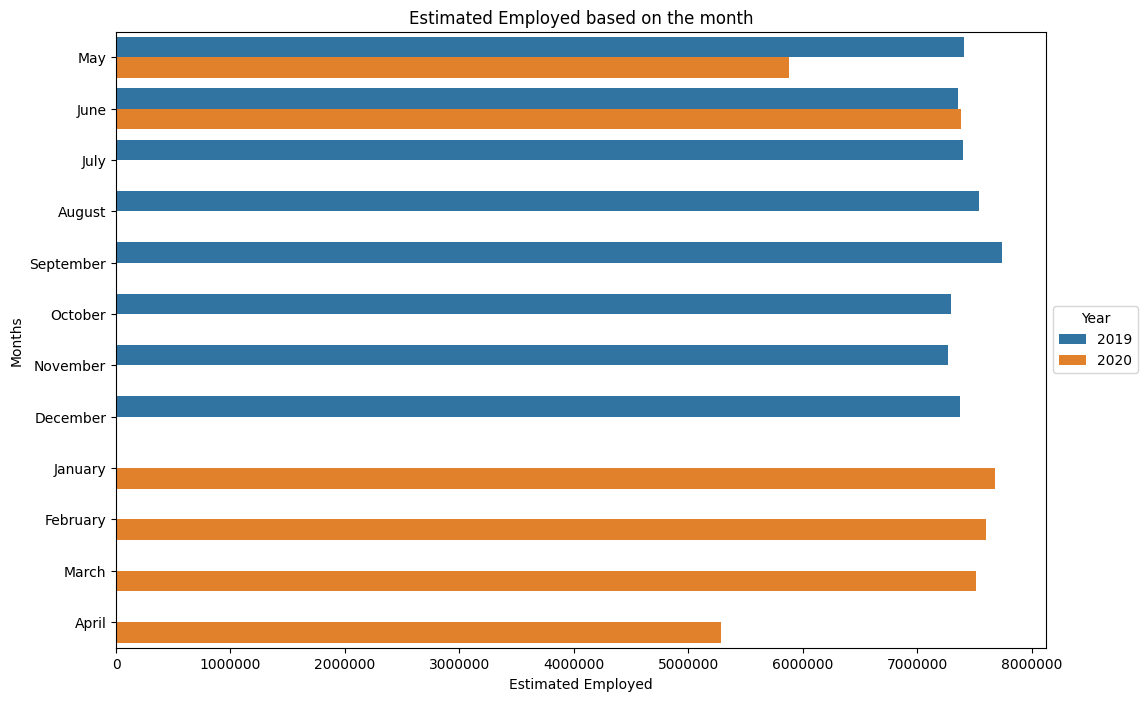

In [ ]:
# Visualization of Estimated Employed based on the month
# This bar chart displays the estimated number of employed individuals for each month.
plt.figure(figsize=(12,8))
ax=sns.barplot(data=df, y='Month_Name', x='Estimated Employed',hue='Year',errorbar=None)
plt.ylabel('Months')
plt.xlabel('Estimated Employed')
plt.title('Estimated Employed based on the month')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
# Select the columns you want to include in the correlation matrix
selected_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate(%)']

# Create a subset of the DataFrame with the selected columns
subset_data = df[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()
correlation_matrix

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate(%),0.002558,0.011300,1.000000


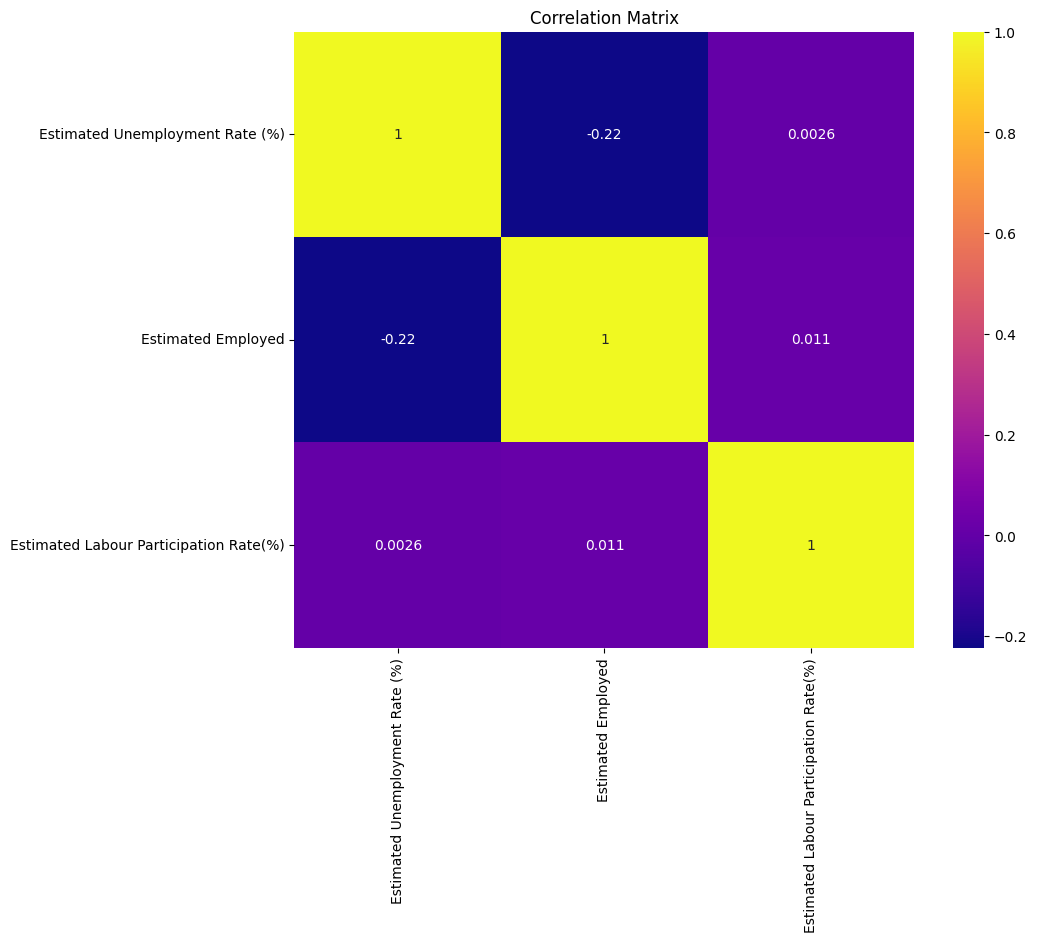

In [ ]:
# Visualization of Correlation Matrix (heatmap)
# This heatmap visualizes the correlation between different variables in the dataset.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

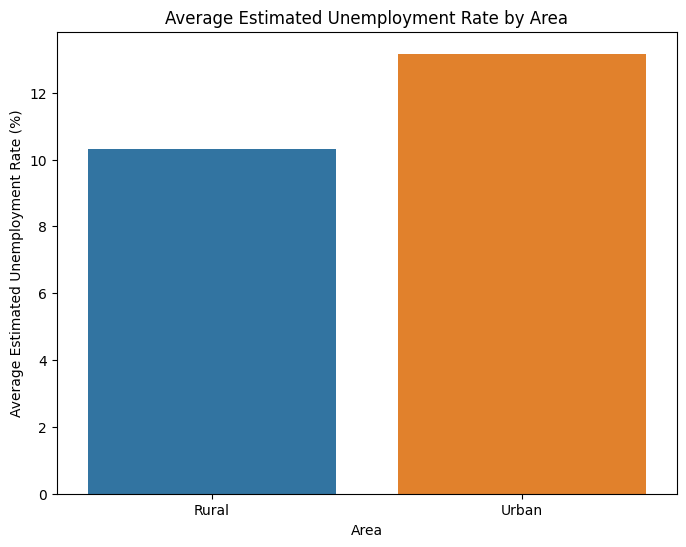

In [ ]:
# Visualization of Urban vs. Rural Analysis
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Area', y='Estimated Unemployment Rate (%)', errorbar=None)
plt.xlabel('Area')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.title('Average Estimated Unemployment Rate by Area')
plt.show()

## **Unemployment Before and After Lockdown Analysis**

In [ ]:
# Calculate Estimated Unemployed before and after lockdown
df['Estimated_unemployed'] = (df['Estimated Unemployment Rate (%)'] / 100) * df['Estimated Employed']

In [ ]:
df.head(2)

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Area,Month_Name,Year,Estimated_unemployed
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May,2019,437968.5735
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,June,2019,358554.3705


In [ ]:
# Define lockdown start and end dates
lockdown_start_date = pd.to_datetime('24-03-2020', format='%d-%m-%Y')
lockdown_end_date = pd.to_datetime('31-05-2020', format='%d-%m-%Y')

In [ ]:
# Filter data for periods before and after lockdown
before_lockdown = df[df['Date'] < lockdown_start_date]
after_lockdown = df[df['Date'] > lockdown_end_date]

In [ ]:
before_lockdown.tail(2)

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Area,Month_Name,Year,Estimated_unemployed
748,West Bengal,2020-01-31,7.27,11208617.0,45.39,Urban,January,2020,814866.4559
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,February,2020,820773.1840


In [ ]:
before_lockdown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   States                                  536 non-null    object        
 1   Date                                    536 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)         536 non-null    float64       
 3   Estimated Employed                      536 non-null    float64       
 4   Estimated Labour Participation Rate(%)  536 non-null    float64       
 5   Area                                    536 non-null    object        
 6   Month_Name                              536 non-null    object        
 7   Year                                    536 non-null    int64         
 8   Estimated_unemployed                    536 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
m

In [ ]:
after_lockdown.tail(2)

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Area,Month_Name,Year,Estimated_unemployed
739,Uttarakhand,2020-06-30,5.08,989470.0,35.61,Urban,June,2020,50265.0760
753,West Bengal,2020-06-30,9.86,9088931.0,37.57,Urban,June,2020,896168.5966


In [ ]:
after_lockdown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 753
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   States                                  50 non-null     object        
 1   Date                                    50 non-null     datetime64[ns]
 2   Estimated Unemployment Rate (%)         50 non-null     float64       
 3   Estimated Employed                      50 non-null     float64       
 4   Estimated Labour Participation Rate(%)  50 non-null     float64       
 5   Area                                    50 non-null     object        
 6   Month_Name                              50 non-null     object        
 7   Year                                    50 non-null     int64         
 8   Estimated_unemployed                    50 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
m

In [ ]:
# Calculate Unemployment Before Lockdown by State
unemployment_before_lockdown = before_lockdown.groupby('States')['Estimated_unemployed'].sum().reset_index()

In [ ]:
unemployment_before_lockdown.head()

,States,Estimated_unemployed
0,Andhra Pradesh,7.812936e+06
1,Assam,5.348689e+06
2,Bihar,3.008054e+07
3,Chandigarh,5.223026e+05
4,Chhattisgarh,6.442775e+06


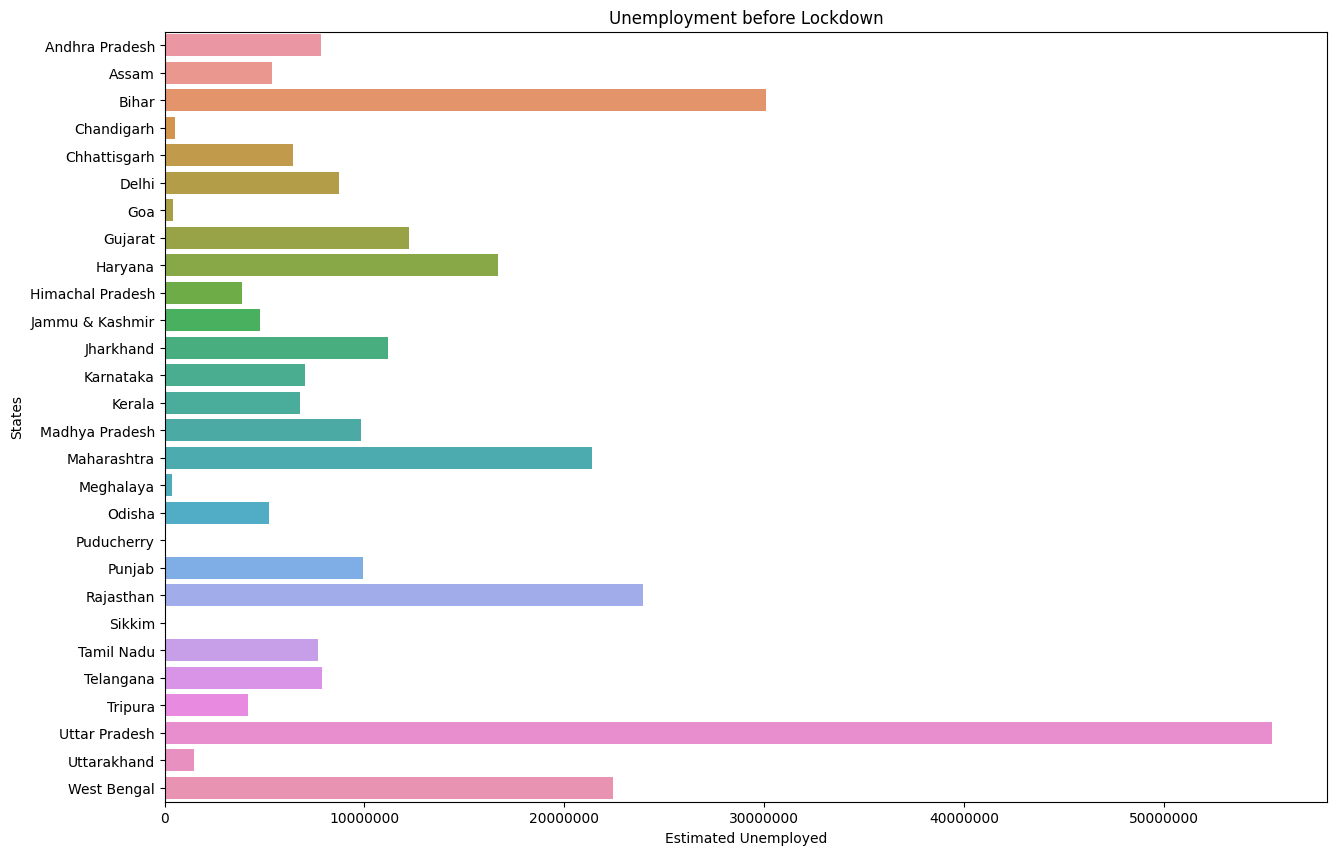

In [ ]:
#This bar chart visualize the number of unemployed persons before the lockdown in different states
plt.figure(figsize=(15,10))
ax=sns.barplot(data=unemployment_before_lockdown, x='Estimated_unemployed', y='States')
plt.xlabel('Estimated Unemployed')
plt.ylabel('States')
plt.title('Unemployment before Lockdown')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

## **Unemployment Before Lockdown - Statewise Overview:**

- **Uttar Pradesh**: Had the highest number of people without jobs, with more than **50 million individuals unemployed**. This shows a **big employment problem in the state.**

- **Bihar**: Was next in line with **over 30 million people without jobs**, indicating a significant unemployment issue.

- **Rajasthan**: Had a moderate level of unemployment, with **between 20 million to 30 million people without jobs**.

- **West Bengal**: Also had a notable unemployment problem, with **over 20 million people jobless**, but it was **less severe than in Rajasthan.**

- **Maharashtra**: Faced a substantial unemployment challenge, **with over 20 million people out of work**. However, it had a **lower unemployment rate than West Bengal and Rajasthan.**

In [ ]:
# Calculate Unemployment After Lockdown by State
unemployment_after_lockdown = after_lockdown.groupby('States')['Estimated_unemployed'].sum().reset_index()

In [ ]:
unemployment_after_lockdown.head()

,States,Estimated_unemployed
0,Andhra Pradesh,4.226975e+05
1,Assam,5.304444e+04
2,Bihar,4.614584e+06
3,Chandigarh,2.212966e+04
4,Chhattisgarh,1.019927e+06


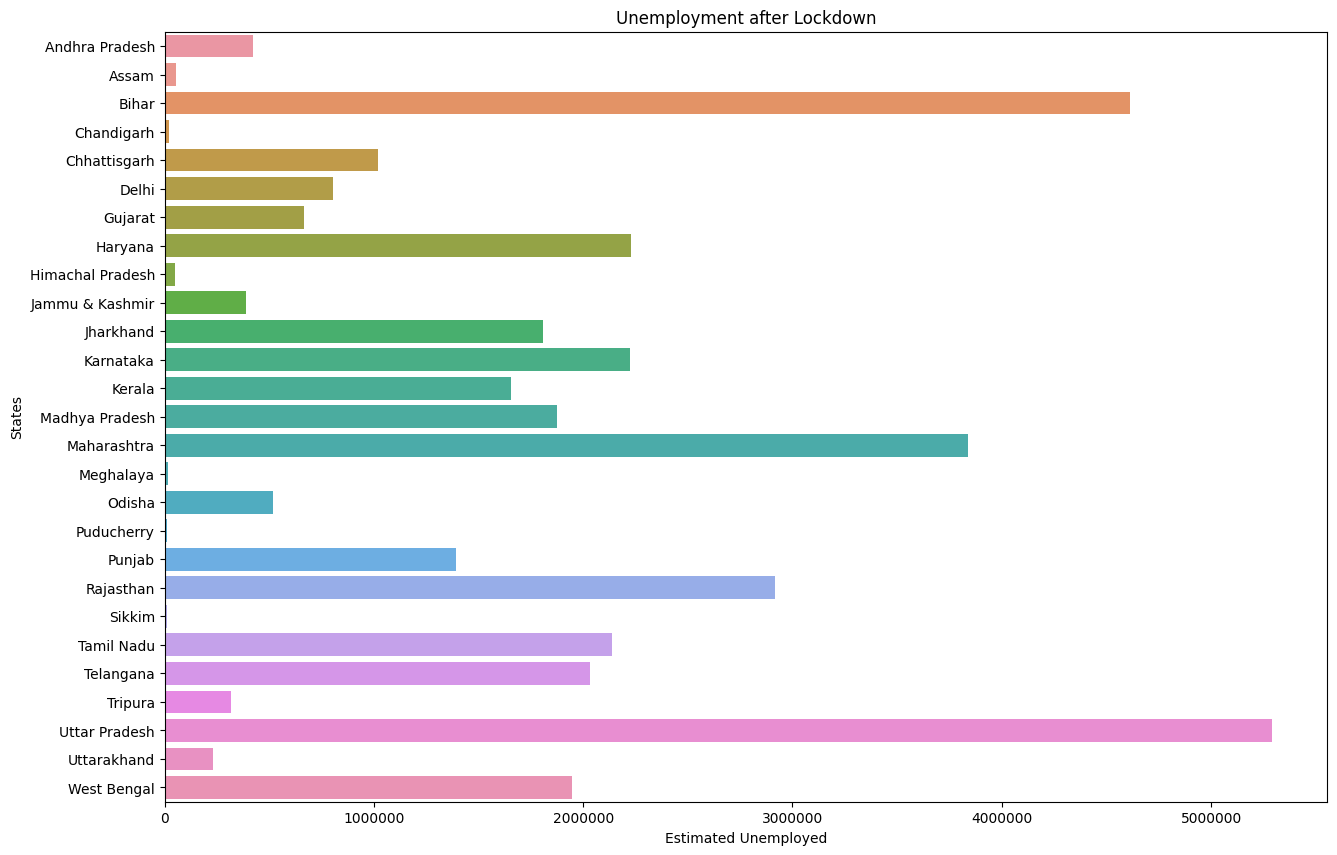

In [ ]:
#This bar chart visualize the number of unemployed persons after the lockdown in different states
plt.figure(figsize=(15,10))
ax=sns.barplot(data=unemployment_after_lockdown, x='Estimated_unemployed', y='States')
plt.xlabel('Estimated Unemployed')
plt.ylabel('States')
plt.title('Unemployment after Lockdown')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

## **Unemployment After the Lockdown - Statewise Overview:**

- **Uttar Pradesh**: **Still had more than 50 million people without jobs even after the lockdown ended**. This shows a long-lasting and major unemployment problem in the state.

- **Bihar**: Had between **40 million to 50 million people without jobs**, indicating a **big unemployment issue post-lockdown**.

- **Maharashtra**: Had a substantial number of people without jobs, with figures **mostly close to 40 million**. This means a significant unemployment challenge persisted in the state.

- **Rajasthan**: Kept unemployment levels **mostly around 30 million**, signifying a steady but substantial unemployment rate after the lockdown.

- **West Bengal**: Maintained unemployment figures **mainly around 20 million**, showing that unemployment continued but at a **somewhat lower rate post-lockdown.**

- **Haryana, Karnataka, and Tamil Nadu**: Saw unemployment numbers **slightly exceeding 20 million**. This means these states faced a notable unemployment problem after the lockdown, with rates **just a bit higher than 20 million individuals.**

## **Overall details observed from the above bar charts (Before and After Lockdown)**

In India, job problems were big before and after the lockdown. Before, places like Uttar Pradesh had more than 50 million people without jobs, Bihar had over 30 million, and other states faced various levels of unemployment. After the lockdown, things didn't get much better. Uttar Pradesh still had over 50 million jobless, Bihar had 40-50 million, and Maharashtra had about 40 million. Rajasthan stayed around 30 million, West Bengal at 20 million, and some other states had slightly more than 20 million unemployed. These facts show that each state had its own job issues both before and after the lockdown.

## **Project Summary:**

### In essence, our project aims to provide a comprehensive understanding of unemployment in India during a pivotal period. We've meticulously analyzed data to unveil disparities in unemployment rates across Indian states and how these rates evolved in response to the lockdown. By shedding light on these complex dynamics, we hope to equip policymakers, economists, and stakeholders with essential insights to formulate effective strategies for addressing India's intricate unemployment challenges and fostering sustainable economic growth.